# **Data analysis exercise**

The dataset we are working with is the **Automobile Dataset**, which is available at [Kaggle](https://www.kaggle.com/datasets/toramky/automobile-dataset). The file was downloaded as auto.csv in order to ease the work.

We will explore this dataset in order to analyze the data with the purpose of resolve the following questions: 

    a) What is the number of vehicles for every maker? 
    b) What is the most common type of fuel used?
    c) Analyze the vehicles by its fuel-type and engine-position.
    d) It is the make relevant to the price? What other factors could increase the vehicle value? 


We also will include a model prediction in other file (soon).

# **Data cleaning**




In [39]:
import pandas as pd
import numpy as np

# Load the dataset as dataframe. The file has no headers.
df = pd.read_csv("/home/cristobal/GitHub/test_import/auto.csv", header=None)

# Add the headers
df.columns=["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]


In [40]:
print("Shape of our dataset: ", df.shape)
df.head()


Shape of our dataset:  (205, 26)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


---
__Handling missing data__

In the dataset, missing vales comes as "?".Replace the "?" values for "NaN"

In [41]:
df.replace("?", np.NaN, inplace=True)

Identify the missing values.

In [42]:
missing_data_list = []
for column in df.columns.values.tolist():
    nan_in_column = df[column].isnull().sum()
    nan_pct = "{}%".format(round(df[column].isnull().mean()*100,1))
    if nan_in_column != 0:
        missing_data_list.append([column, nan_in_column, nan_pct])

missing_data = pd.DataFrame(missing_data_list, columns=["attribute", "number of nan", '% of Nan'])
missing_data


,attribute,number of nan,% of Nan
0,normalized-losses,41,20.0%
1,num-of-doors,2,1.0%
2,bore,4,2.0%
3,stroke,4,2.0%
4,horsepower,2,1.0%
5,peak-rpm,2,1.0%
6,price,4,2.0%


We are going to do three different things:
- 1. Drop nan for price attribute. This is our target so an empty entry would not solve the proposed questions.
- 2. Replace missing data by frequency on 'num-of-doors' attribute.
- 3. Replace missing data by mean: rest of attributes.

In [43]:
## 1 - Drop NaN values for 'price' column.
df.dropna(subset=("price"), axis=0, inplace=True)

# 2- Replace 'num-of-doors' missing data by frequency
most_common_type = df["num-of-doors"].value_counts().idxmax()
df["num-of-doors"].replace(np.nan, most_common_type, inplace=True)

# 3- Replace the rest of missing data by mean, creating a list of the values from missing_data df
missing_data_list = missing_data["attribute"].tolist()

# delete 'price' and 'num-of-doors' from our list:
missing_data_list.remove("price")
missing_data_list.remove("num-of-doors")

# iterate for every attribute in our missing_data_list
for attribute in missing_data_list:
    # cast a pandas object to a float format
    df[attribute] = df[attribute].astype("float")
    # replace values by mean
    df[attribute].replace(np.nan, df[attribute].mean(), inplace=True)

# reset index
df.reset_index(drop=True, inplace=True)

---
**Correcting data format**

In [44]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

We can see that our 'price' column doesn't have the correct data type, so we need to convert its data type into a proper format.

In [45]:
df["price"] = df["price"].astype("float")

---
**Data standardization**

In the dataset, the attributes 'city-mpg' and 'highway-mpg' use the mpg (miles per gallon) unit. This unit is not well accepted in Europe so we need to standardize this fuel consumption unit with L/100km standard.

The equivalent for 1 mpg is equal to 235.215 l/100km so we need to apply a mathematical operation into two new attributes. 



In [46]:
unit_equivalent = 235.215

# Make the mathematical operation
df["city-L/100km"] = round(unit_equivalent/df["city-mpg"], 1)
df["highway-L/100km"] = round(unit_equivalent/df["highway-mpg"], 1)

# Delete mpg columns
df.drop(labels=["city-mpg", "highway-mpg"], axis=1, inplace=True)

df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,price,city-L/100km,highway-L/100km
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,13495.0,11.2,8.7
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,16500.0,11.2,8.7
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,16500.0,12.4,9.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,13950.0,9.8,7.8
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,17450.0,13.1,10.7


In [47]:
df.shape

(201, 26)

# **Solutions**

 

In [48]:
# Import all the libraries needed:
import seaborn as sns
import matplotlib.pyplot as plt

**a) What is the number of vehicles for every maker?**

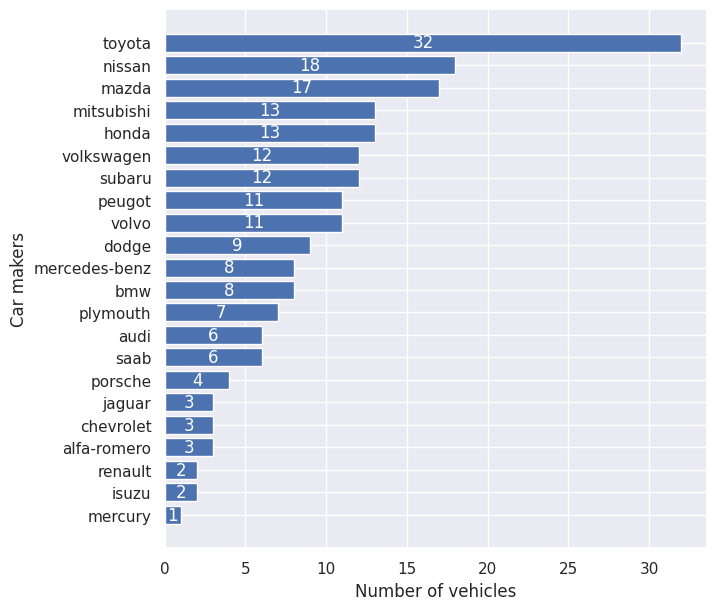

In [49]:
# Get the number of vehicles for every maker.
vehicle_makers = df["make"].value_counts().sort_values()

# plt.figure(figsize=(8,5))
fig, ax = plt.subplots()
fig = plt.barh(vehicle_makers.index, vehicle_makers.values, label=vehicle_makers.values)
ax.bar_label(fig, label_type="center", color="white")

plt.ylabel("Car makers")
plt.xlabel("Number of vehicles")
plt.show()



**b) What is the most common type of fuel used?**

In [91]:
fuel_data = df["fuel-type"].value_counts()
new_df = fuel_data.to_frame()
new_df["percentage"] = (round(new_df["count"] / new_df["count"].sum() * 100, 1))
new_df["percentage"] = new_df["percentage"].astype("string")
new_df["percentage"] = new_df["percentage"] + "%"

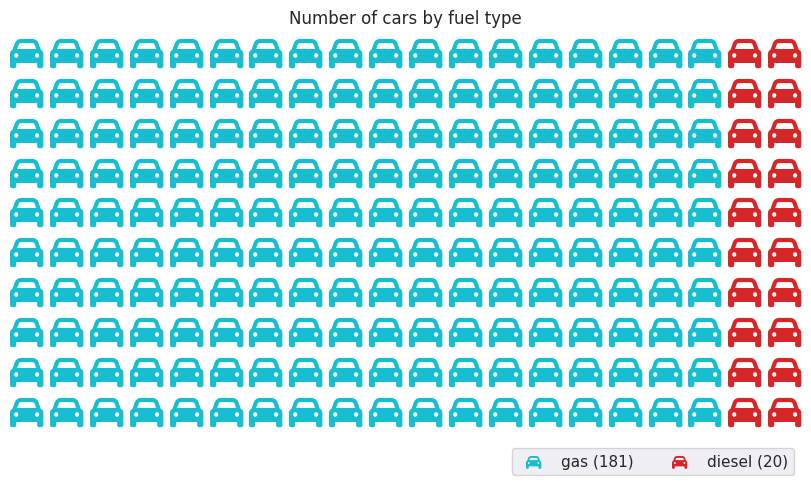

In [51]:
from pywaffle import Waffle

fig = plt.figure(
    FigureClass=Waffle,
    rows=10,
    columns=20,
    values=new_df["count"],
    figsize=(10,5),
    title={"label":"Number of cars by fuel type"},
    labels=[f"{k} ({v})" for k, v in new_df["count"].items()],
    icons="car",
    icon_legend=True,
    legend={"loc":"lower right", "bbox_to_anchor":(1, -.15), "ncol": len(new_df)},
    colors=["tab:cyan", "tab:red"],
)

plt.show()

**c) Analyze the vehicles by its fuel-type and engine-location.**

As diesel cars represent a minority in the dataset, its necessary to find the makes that has this kind of vehicle in order to compare the price between them.

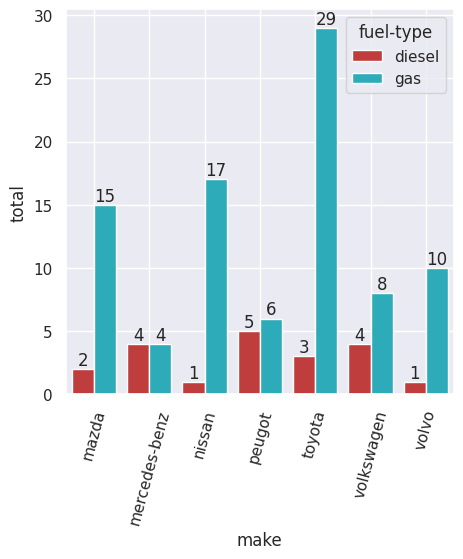

In [63]:
# Filter makes which diesel vehicles
only_diesel = df[df["fuel-type"]=="diesel"]
diesel_make = only_diesel["make"].unique()

# Filter makes to compare between both fuel-type: gas and diesel
filtered_df = df[df["make"].isin(diesel_make)]

# count the number of vehicles for fuel-type and engine-location
df_fuel_type = filtered_df.groupby(by=["make", "fuel-type", "engine-location"]).count()

# Add a new column named total with the amount of vehicles for every type
df_fuel_type["total"] = df_fuel_type["symboling"]

# Reset index to revert multi-index done by groupby method
df_fuel_type = df_fuel_type.reset_index()

figure = sns.barplot(data=df_fuel_type, 
                     x="make", 
                     y="total", 
                     hue="fuel-type",
                     errorbar=None,
                     palette=["tab:red", "tab:cyan"]
                     )
figure.set_xticklabels(figure.get_xticklabels(),rotation=75)

sns.set(rc={'figure.figsize':(5,3)})
for i in figure.containers:
    figure.bar_label(i,)

figure.grid(visible=True, 
            axis="both",
)

We can go deeper to find out if the car price vary with the fuel-type for the same make, or if it could be dependant of more variables.

[Text(0, 0, 'mazda'),
 Text(1, 0, 'mercedes-benz'),
 Text(2, 0, 'nissan'),
 Text(3, 0, 'peugot'),
 Text(4, 0, 'toyota'),
 Text(5, 0, 'volkswagen'),
 Text(6, 0, 'volvo')]

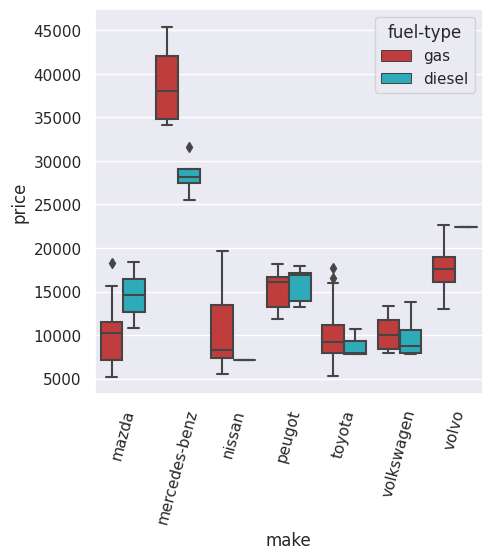

In [66]:
import seaborn as sns

fig = sns.boxplot(data=filtered_df, 
            x="make", 
            y="price", 
            hue="fuel-type",
            palette=["tab:red", "tab:cyan"])

sns.set(rc={'figure.figsize':(5,5)})
fig.set_xticklabels(figure.get_xticklabels(),rotation=75)


**Conclusion**: Mazda diesel cars are more expensive than gas cars, meanwhile Mercedes-Benz cars which fuel-type are disel are cheaper than gas cars. 

For the rest of makes we can not get a straigtforward conclusion because on the little ammount of vehicles (Nissan and Volvo) and because price value overlap for every fuel-type vehicle.

__d) It is the make relevant to the price? What other factors could increase the vehicle value?__

Let's find out the correlation between numeric values and price.

<Axes: >

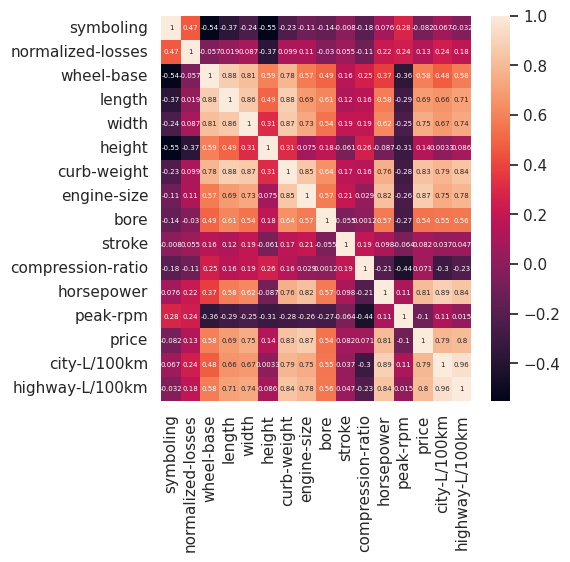

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt 

# separate dataframes for each dytpes (numbers and objects) 
df_num = df.select_dtypes(include="number")
df_object = df.select_dtypes(include="object")

# Get an heatmap for all our numeric attributes.
sns.heatmap(df_num.corr(),cmap="rocket", annot=True, annot_kws={"fontsize": 5})

As we can see in the previous image, there are several attributes that reveals a strong positive linear correlation with 'price':
- length
- width
- curb-weight
- engine-size
- horsepower
- city-L/100km
- highway-L/100km

Lets visualize them individually:


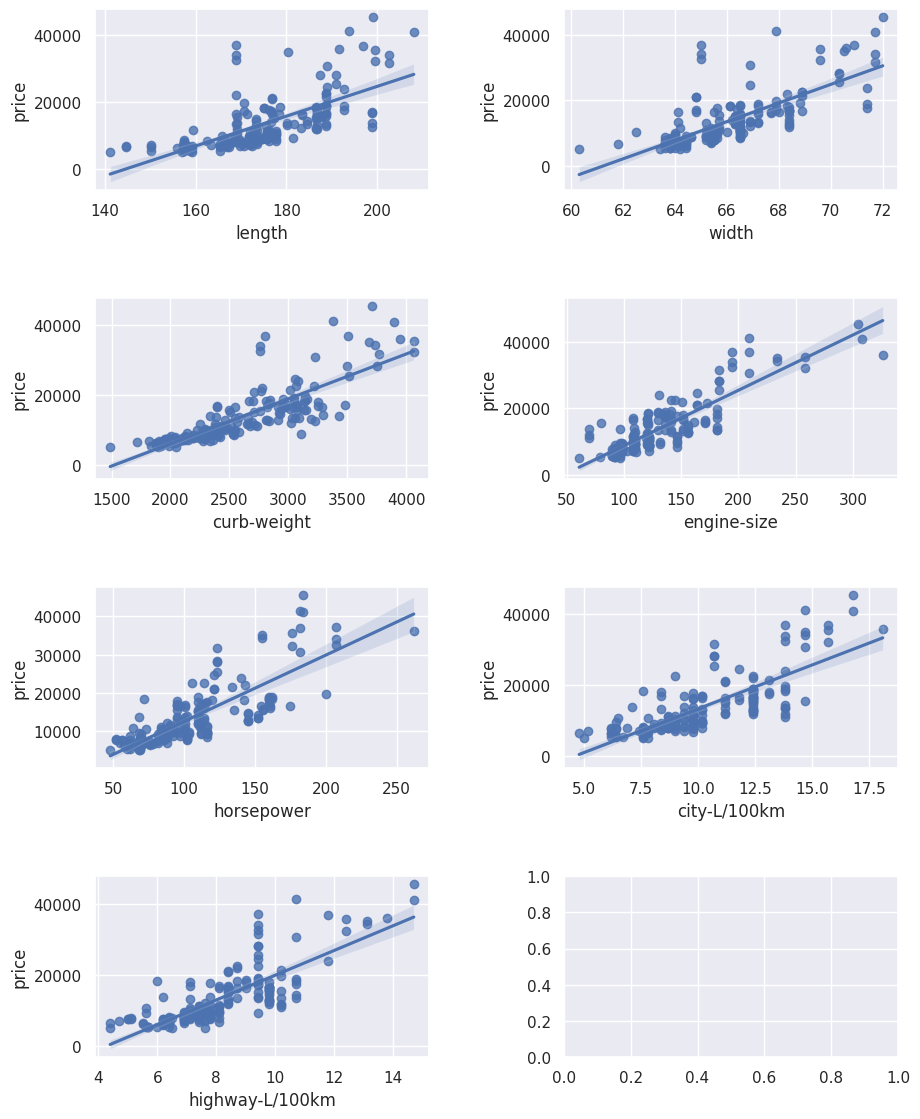

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make a list with all the previous attributes having a strong correlation.
sel_attributes = ["length", "width", "curb-weight", "engine-size", "horsepower",
                  "city-L/100km", "highway-L/100km"]

fig, axes = plt.subplots(round(len(sel_attributes)/2), 2)

# Iterate for every attribute to plot a regplot
for index, attribute in enumerate(sel_attributes, 0):
    pos_row, pos_column = divmod(index, 2)
    box = sns.regplot(data=df, x=attribute, y="price", ax=axes[pos_row, pos_column])
    sns.set(rc={'figure.figsize':(10,12)})
      
plt.tight_layout(pad=3)      
plt.show()

We also check if the correlation between any of these values and 'price' is statistically significant

In [56]:
from scipy import stats

# Iterate for every desired attribute
for attribute in ["length", "width", "curb-weight", "engine-size", "horsepower",
                  "city-L/100km", "highway-L/100km"]:
    pearson_coef, p_value = stats.pearsonr(df[attribute], df["price"])
    print("="*10, attribute, "="*40)
    print(f"Pearson Corr Coef: {pearson_coef} \t P-value: {p_value}")
    print()

========== length ========================================
Pearson Corr Coef: 0.6906283804483639 	 P-value: 8.01647746615924e-30

========== width ========================================
Pearson Corr Coef: 0.7512653440522674 	 P-value: 9.20033551048144e-38

========== curb-weight ========================================
Pearson Corr Coef: 0.8344145257702844 	 P-value: 2.189577238893965e-53

========== engine-size ========================================
Pearson Corr Coef: 0.8723351674455185 	 P-value: 9.265491622198793e-64

========== horsepower ========================================
Pearson Corr Coef: 0.8096811975632288 	 P-value: 6.05844464971006e-48

========== city-L/100km ========================================
Pearson Corr Coef: 0.7902692338176969 	 P-value: 3.3393520933347896e-44

========== highway-L/100km ========================================
Pearson Corr Coef: 0.801312522001755 	 P-value: 2.792843225297929e-46



Since all the P-values are lower than 0.001, the correlation between all analyzed attributes and 'price' are statistically significant. Therefore, the could be used to construct our prediction model.

---
__Categorical variables__


As observed with numeric variables, we try to find variables that could be related with prices.
First at all, we are going to find out the different values for each categorical value.

In [57]:
for column in df_object.columns:
    print(column, ": ", df_object[column].unique())
    print()

make :  ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']

fuel-type :  ['gas' 'diesel']

aspiration :  ['std' 'turbo']

num-of-doors :  ['two' 'four']

body-style :  ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']

drive-wheels :  ['rwd' 'fwd' '4wd']

engine-location :  ['front' 'rear']

engine-type :  ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf']

num-of-cylinders :  ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']

fuel-system :  ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']



Let's draw some boxplot to see the distribution between these price and these categories.

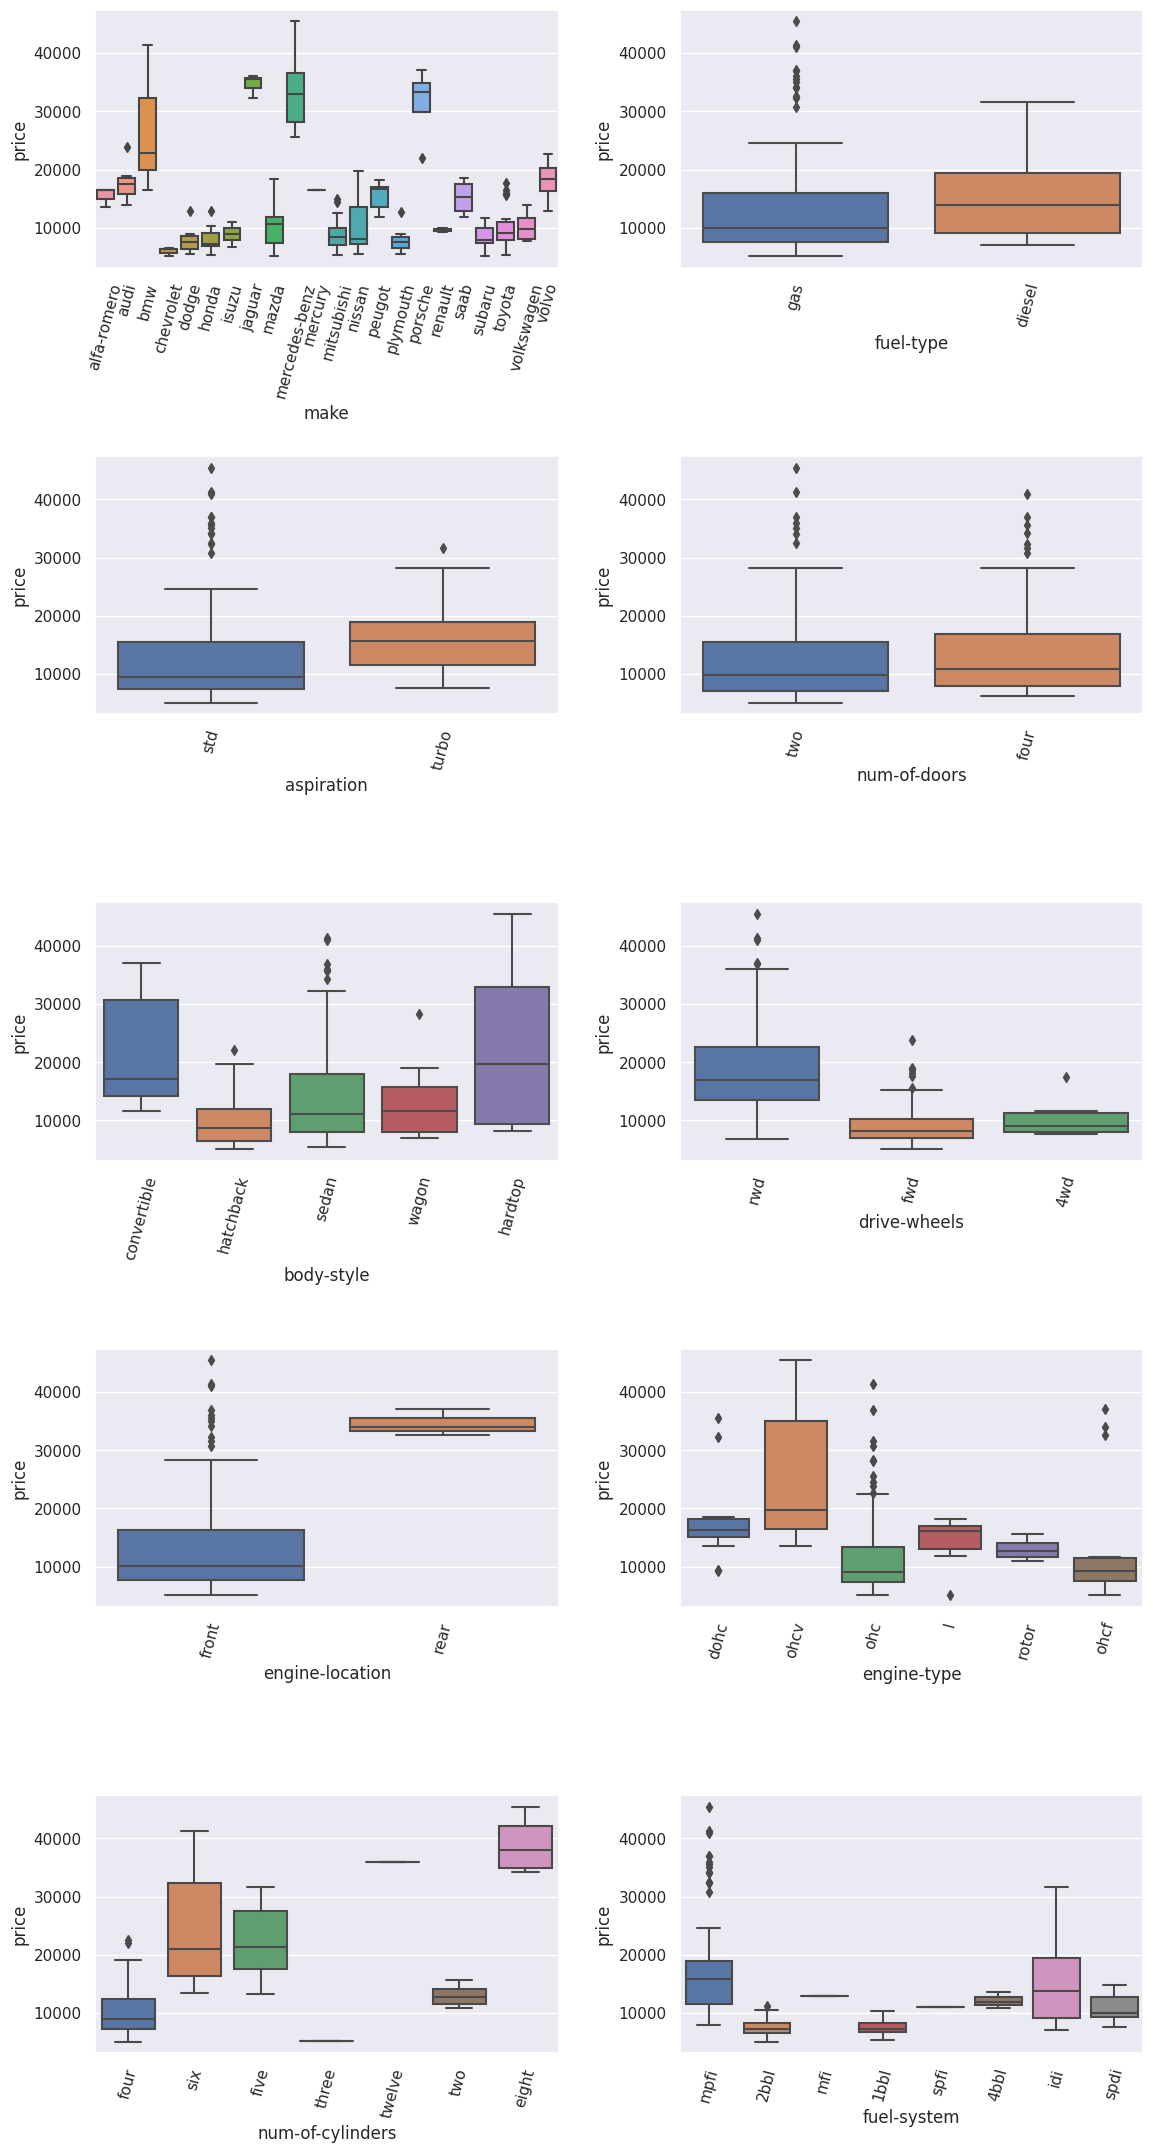

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(round(len(df_object.columns)/2), 2)

for index, column in enumerate(df_object, 0):
    pos_row, pos_column = divmod(index, 2)
    box = sns.boxplot(data=df, x=column, y="price", ax=axes[pos_row, pos_column])
    box.set_xticklabels(box.get_xticklabels(),rotation=75)
    sns.set(rc={'figure.figsize':(10,22)})

        
plt.tight_layout(pad=2)
plt.show()

_Conclussions:_

- We can assume that vehicle makes as BMW, Jaguar, Mercedes-Benz and Porsche are related with their value. 

- The distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as an attribute extrictly related with the car price. It is also well known that performance car makes as Porsche, used to locate their engine in the rear. 

- The distributions of price between the different body-style categories have a significant overlap, so body-style would not be a good parameter to predict the price, as well as fuel-system, engine-type, num-doors, fuel-type and aspiration.

- The distribution of price between the different drive-wheels categories differs. So drive-wheels could potentially be a predictor of price.
